# Linear Regression

### Importing libraries

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing dateset

In [116]:
train_set = pd.read_csv('B-train.csv')
test_set = pd.read_csv('B-test.csv')
cols = ['x1','x2','x3','x4','x5','x6','x7','x8','y']

In [117]:
train_set

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,58.76,123.79,-3.12,-13.11,4.03,224.40,-248.42,7.18,6.73
1,120.85,163.83,14.75,-2.12,8.61,28.05,-73.58,670.29,7.28
2,-19.30,39.05,0.55,1.34,-1.70,-2.19,308.07,3567.67,5.22
3,-65.72,-36.37,10.76,-8.88,15.04,-5.70,14.60,1054.30,6.66
4,11.00,-64.78,-3.23,7.37,25.74,20.48,91.13,102.21,-0.25
...,...,...,...,...,...,...,...,...,...
185,NaN,8.79,-10.48,NaN,12.52,-10.13,NaN,1174.43,3.69
186,-30.81,48.65,NaN,2.58,8.72,6.97,-69.11,1583.24,5.99
187,NaN,50.33,3.13,13.03,NaN,4.53,-173.70,254.72,-6.73
188,101.46,-67.42,0.44,-3.74,8.93,-4.29,21.79,40925.29,-13.39


In [118]:
test_set

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,50.69,-120.50,-5.93,7.43,-16.28,-9.26,96.68,10510.35,B_01
1,102.08,74.69,-4.95,-2.20,-4.95,NaN,27.30,36952.37,B_02
2,NaN,49.86,1.00,-5.35,0.72,-9.81,NaN,24768.46,B_03
3,49.39,-101.88,8.69,-7.54,-11.28,4.61,-15.11,NaN,B_04
4,140.49,59.99,0.05,6.55,NaN,-0.42,109.93,2603.04,B_05
5,54.08,NaN,11.00,-16.44,5.31,17.83,-90.67,5.20,B_06
6,106.48,-50.55,16.47,NaN,1.34,-11.53,138.03,1753.93,B_07
7,-83.82,-104.84,NaN,-13.70,10.19,-2.51,-34.02,7494.36,B_08
8,147.15,9.14,-3.06,1.97,8.14,26.99,37.34,249.96,B_09
9,8.68,-207.09,-4.37,-10.22,-5.01,10.57,-24.65,20.43,B_10


### Data Processing

In [119]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      180 non-null    float64
 1   x2      180 non-null    float64
 2   x3      181 non-null    float64
 3   x4      180 non-null    float64
 4   x5      181 non-null    float64
 5   x6      180 non-null    float64
 6   x7      180 non-null    float64
 7   x8      180 non-null    float64
 8   y       188 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [120]:
before_fill = train_set.describe()

#### Fill missing values

In [121]:
train_set = train_set.to_numpy()

In [122]:
train_set

array([[ 5.876000e+01,  1.237900e+02, -3.120000e+00, ..., -2.484200e+02,
         7.180000e+00,  6.730000e+00],
       [ 1.208500e+02,  1.638300e+02,  1.475000e+01, ..., -7.358000e+01,
         6.702900e+02,  7.280000e+00],
       [-1.930000e+01,  3.905000e+01,  5.500000e-01, ...,  3.080700e+02,
         3.567670e+03,  5.220000e+00],
       ...,
       [          nan,  5.033000e+01,  3.130000e+00, ..., -1.737000e+02,
         2.547200e+02, -6.730000e+00],
       [ 1.014600e+02, -6.742000e+01,  4.400000e-01, ...,  2.179000e+01,
         4.092529e+04, -1.339000e+01],
       [-8.733000e+01, -1.689000e+01,  7.390000e+00, ...,           nan,
         3.730770e+03,  4.400000e+00]])

In [123]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(train_set[:, :])
train_set[: , :] = imputer.transform(train_set[:, :])

In [124]:
train_set = pd.DataFrame(train_set, columns=cols)

In [125]:
train_set

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,58.760000,123.79,-3.120000,-13.110000,4.030000,224.40,-248.420000,7.18,6.73
1,120.850000,163.83,14.750000,-2.120000,8.610000,28.05,-73.580000,670.29,7.28
2,-19.300000,39.05,0.550000,1.340000,-1.700000,-2.19,308.070000,3567.67,5.22
3,-65.720000,-36.37,10.760000,-8.880000,15.040000,-5.70,14.600000,1054.30,6.66
4,11.000000,-64.78,-3.230000,7.370000,25.740000,20.48,91.130000,102.21,-0.25
...,...,...,...,...,...,...,...,...,...
185,14.175056,8.79,-10.480000,-0.299167,12.520000,-10.13,16.658889,1174.43,3.69
186,-30.810000,48.65,-2.560663,2.580000,8.720000,6.97,-69.110000,1583.24,5.99
187,14.175056,50.33,3.130000,13.030000,-0.412044,4.53,-173.700000,254.72,-6.73
188,101.460000,-67.42,0.440000,-3.740000,8.930000,-4.29,21.790000,40925.29,-13.39


In [126]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
 7   x8      190 non-null    float64
 8   y       190 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [127]:
train_set.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,1.900000e+02,190.000000
mean,14.175056,-12.012278,-2.560663,-0.299167,-0.412044,-0.336167,16.658889,1.547451e+05,2.933298
std,349.459340,325.631289,33.963500,32.629164,32.319742,38.456135,362.758170,9.419358e+05,9.151513
min,-2637.520000,-2049.360000,-250.110000,-233.640000,-216.320000,-282.960000,-1987.360000,4.800000e-01,-19.830000
25%,-66.297500,-89.797500,-9.040000,-6.142500,-7.660000,-7.160000,-70.387500,1.561850e+03,-2.877500
50%,6.720000,-12.012278,-2.560663,-0.299167,-0.376022,-0.336167,16.658889,5.660375e+03,2.941649
75%,58.827500,48.487500,5.647500,6.685000,6.460000,7.132500,69.777500,1.853828e+04,8.487500
max,2661.480000,2217.600000,192.870000,194.240000,205.920000,224.400000,2772.630000,7.503436e+06,30.600000


#### Capping Outlier

In [128]:
def iqr_capping(df, cols):
	for col in cols:
		q1 = df[col].quantile(0.25)
		q3 = df[col].quantile(0.75)
		iqr = q3 - q1
		upper = q3 + (1.5 * iqr)
		lower = q1 - (1.5 * iqr)

		df[col] = np.where( df[col] > upper, upper, np.where( df[col] < lower, lower, df[col]))


In [129]:
iqr_capping(train_set, cols)

In [130]:
train_set.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.462240,-14.218067,-1.993847,0.121281,-0.315202,0.279965,8.238863,12475.497026,2.897929
std,105.479598,105.463929,10.901441,10.088170,10.845954,10.773964,101.175479,14894.504155,9.054914
min,-253.985000,-297.225000,-31.071250,-25.383750,-28.840000,-28.598750,-280.635000,0.480000,-19.830000
25%,-66.297500,-89.797500,-9.040000,-6.142500,-7.660000,-7.160000,-70.387500,1561.850000,-2.877500
50%,6.720000,-12.012278,-2.560663,-0.299167,-0.376022,-0.336167,16.658889,5660.375000,2.941649
75%,58.827500,48.487500,5.647500,6.685000,6.460000,7.132500,69.777500,18538.280000,8.487500
max,246.515000,255.915000,27.678750,25.926250,27.640000,28.571250,280.025000,44002.925000,25.535000


In [131]:
# for col in cols:
# 	plt.figure(figsize=(16,4))
# 	plt.subplot(141)
# 	sns.boxplot(train_set[col])
# 	plt.show()

### Data Exploration

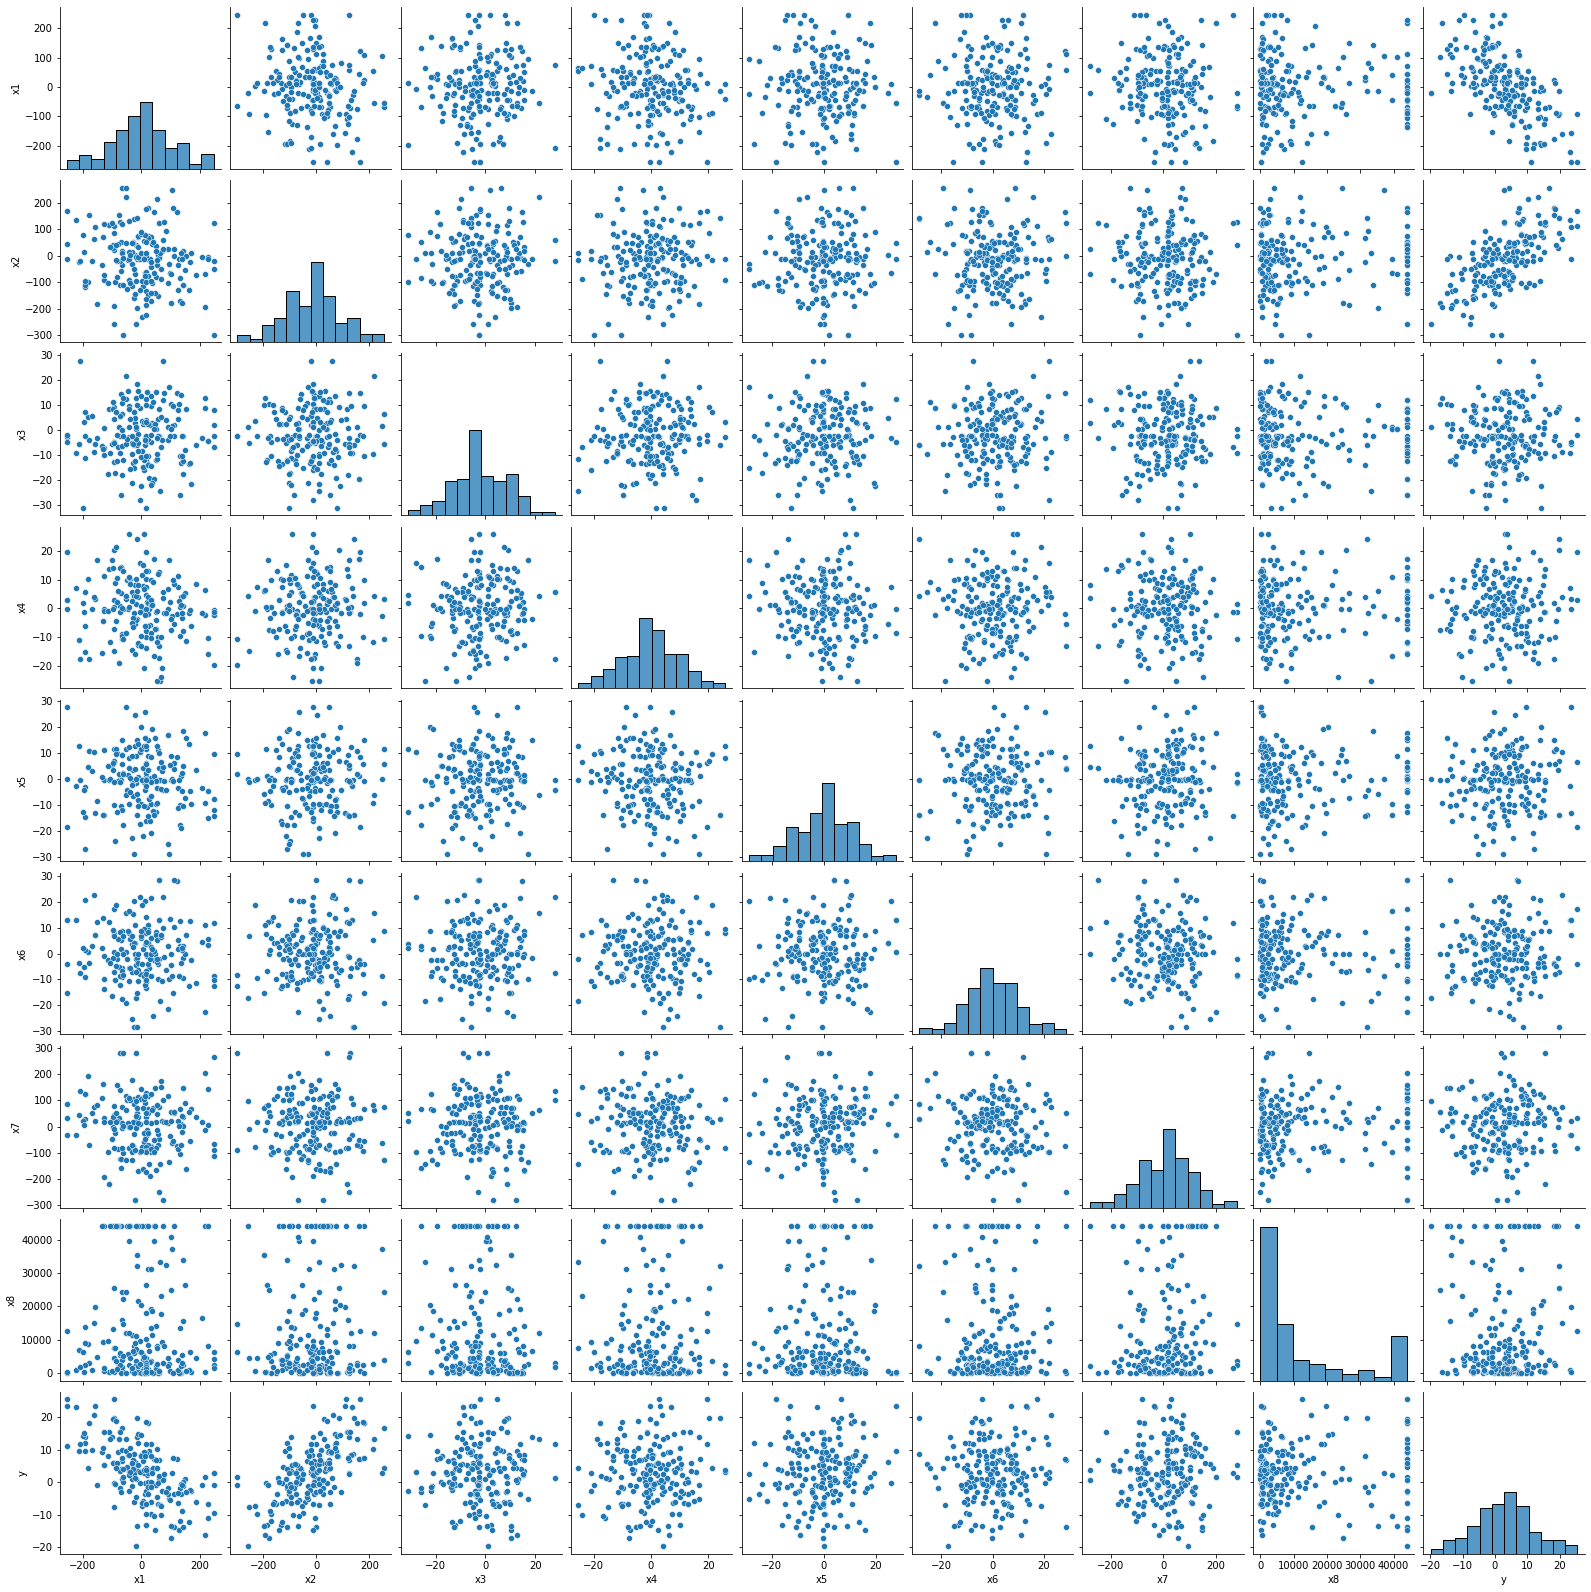

In [132]:
sns.pairplot(train_set)

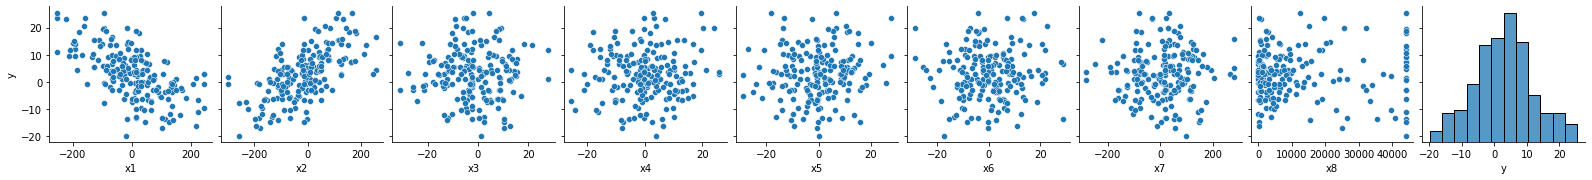

In [133]:
sns.pairplot(train_set, x_vars=train_set.columns, y_vars=['y'])

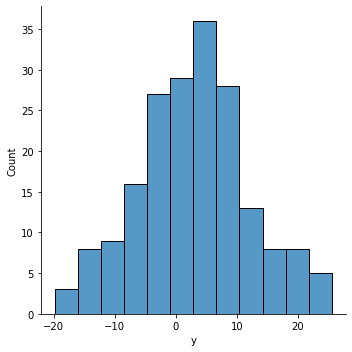

In [134]:
sns.displot(train_set['y'])

In [135]:
train_set.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,y
x1,1.000000,-0.135691,0.024331,-0.126110,-0.048843,-0.018584,-0.072768,-0.006224,-0.604527
x2,-0.135691,1.000000,0.043298,0.059860,0.034134,-0.010383,-0.066492,0.051218,0.625237
x3,0.024331,0.043298,1.000000,0.069147,0.050837,0.062116,0.010696,-0.058366,-0.002915
x4,-0.126110,0.059860,0.069147,1.000000,-0.108311,0.006296,-0.053747,0.002611,0.071630
x5,-0.048843,0.034134,0.050837,-0.108311,1.000000,0.029312,0.057951,0.010754,0.093429
x6,-0.018584,-0.010383,0.062116,0.006296,0.029312,1.000000,-0.122902,-0.093087,0.045832
x7,-0.072768,-0.066492,0.010696,-0.053747,0.057951,-0.122902,1.000000,0.089947,0.029316
x8,-0.006224,0.051218,-0.058366,0.002611,0.010754,-0.093087,0.089947,1.000000,-0.005303
y,-0.604527,0.625237,-0.002915,0.071630,0.093429,0.045832,0.029316,-0.005303,1.000000


<AxesSubplot:>

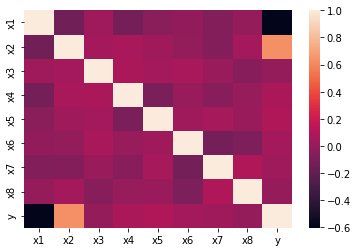

In [136]:
sns.heatmap(train_set.corr())

In [137]:
train_set.corr().sort_values('y')[['y']]

,y
x1,-0.604527
x8,-0.005303
x3,-0.002915
x7,0.029316
x6,0.045832
x4,0.071630
x5,0.093429
x2,0.625237
y,1.000000


### Select Feature and split X and y

In [138]:
X_train = train_set.loc[ :, ['x1','x2']]
y_train = train_set.loc[:, 'y']

In [139]:
X_train

,x1,x2
0,58.760000,123.79
1,120.850000,163.83
2,-19.300000,39.05
3,-65.720000,-36.37
4,11.000000,-64.78
...,...,...
185,14.175056,8.79
186,-30.810000,48.65
187,14.175056,50.33
188,101.460000,-67.42


In [140]:
y_train

0       6.73
1       7.28
2       5.22
3       6.66
4      -0.25
       ...  
185     3.69
186     5.99
187    -6.73
188   -13.39
189     4.40
Name: y, Length: 190, dtype: float64

In [141]:
# train_set.to_csv('B-train-cleaned.csv')

### Linear regression modeling

In [142]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [143]:
regressor.coef_

array([-0.04544948,  0.04751358])

In [144]:
regressor.intercept_

3.6399388345614794

In [145]:
print("Linear regression MODEL")
print("")
print(y_train.name, "=")
for i in range(len(X_train.columns)):
  print("", regressor.coef_[i],"*",X_train.columns[i],"   +")
print("", regressor.intercept_)

Linear regression MODEL

y =
 -0.04544948387682336 * x1    +
 0.04751358455781909 * x2    +
 3.6399388345614794


### Predict value

In [146]:
test_set

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,50.69,-120.50,-5.93,7.43,-16.28,-9.26,96.68,10510.35,B_01
1,102.08,74.69,-4.95,-2.20,-4.95,NaN,27.30,36952.37,B_02
2,NaN,49.86,1.00,-5.35,0.72,-9.81,NaN,24768.46,B_03
3,49.39,-101.88,8.69,-7.54,-11.28,4.61,-15.11,NaN,B_04
4,140.49,59.99,0.05,6.55,NaN,-0.42,109.93,2603.04,B_05
5,54.08,NaN,11.00,-16.44,5.31,17.83,-90.67,5.20,B_06
6,106.48,-50.55,16.47,NaN,1.34,-11.53,138.03,1753.93,B_07
7,-83.82,-104.84,NaN,-13.70,10.19,-2.51,-34.02,7494.36,B_08
8,147.15,9.14,-3.06,1.97,8.14,26.99,37.34,249.96,B_09
9,8.68,-207.09,-4.37,-10.22,-5.01,10.57,-24.65,20.43,B_10


In [147]:
X_test = test_set.iloc[:,:-1].values

In [148]:
X_test

array([[ 5.069000e+01, -1.205000e+02, -5.930000e+00,  7.430000e+00,
        -1.628000e+01, -9.260000e+00,  9.668000e+01,  1.051035e+04],
       [ 1.020800e+02,  7.469000e+01, -4.950000e+00, -2.200000e+00,
        -4.950000e+00,           nan,  2.730000e+01,  3.695237e+04],
       [          nan,  4.986000e+01,  1.000000e+00, -5.350000e+00,
         7.200000e-01, -9.810000e+00,           nan,  2.476846e+04],
       [ 4.939000e+01, -1.018800e+02,  8.690000e+00, -7.540000e+00,
        -1.128000e+01,  4.610000e+00, -1.511000e+01,           nan],
       [ 1.404900e+02,  5.999000e+01,  5.000000e-02,  6.550000e+00,
                  nan, -4.200000e-01,  1.099300e+02,  2.603040e+03],
       [ 5.408000e+01,           nan,  1.100000e+01, -1.644000e+01,
         5.310000e+00,  1.783000e+01, -9.067000e+01,  5.200000e+00],
       [ 1.064800e+02, -5.055000e+01,  1.647000e+01,           nan,
         1.340000e+00, -1.153000e+01,  1.380300e+02,  1.753930e+03],
       [-8.382000e+01, -1.048400e+02,    

In [149]:
test_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
test_imputer.fit(X_test[:,:])
X_test[:,:] = test_imputer.transform(X_test[:,:])

In [150]:
X_test = pd.DataFrame(X_test, columns=['x1','x2','x3','x4','x5','x6','x7','x8'])

In [151]:
X_test

,x1,x2,x3,x4,x5,x6,x7,x8
0,50.690000,-120.500000,-5.93,7.430000,-16.280000,-9.260000,96.680000,10510.350000
1,102.080000,74.690000,-4.95,-2.200000,-4.950000,2.941111,27.300000,36952.370000
2,63.913333,49.860000,1.00,-5.350000,0.720000,-9.810000,27.203333,24768.460000
3,49.390000,-101.880000,8.69,-7.540000,-11.280000,4.610000,-15.110000,9373.122222
4,140.490000,59.990000,0.05,6.550000,-1.313333,-0.420000,109.930000,2603.040000
5,54.080000,-43.464444,11.00,-16.440000,5.310000,17.830000,-90.670000,5.200000
6,106.480000,-50.550000,16.47,-4.388889,1.340000,-11.530000,138.030000,1753.930000
7,-83.820000,-104.840000,2.10,-13.700000,10.190000,-2.510000,-34.020000,7494.360000
8,147.150000,9.140000,-3.06,1.970000,8.140000,26.990000,37.340000,249.960000
9,8.680000,-207.090000,-4.37,-10.220000,-5.010000,10.570000,-24.650000,20.430000


In [152]:
# X_test.to_csv('B-test-cleaned.csv')

In [153]:
X_test = X_test.loc[:, ['x1','x2']]

In [154]:
X_test

,x1,x2
0,50.690000,-120.500000
1,102.080000,74.690000
2,63.913333,49.860000
3,49.390000,-101.880000
4,140.490000,59.990000
5,54.080000,-43.464444
6,106.480000,-50.550000
7,-83.820000,-104.840000
8,147.150000,9.140000
9,8.680000,-207.090000


In [155]:
y_pred = regressor.predict(X_test)

In [156]:
y_pred

array([-4.38928244,  2.54924515,  3.10413815, -3.44549517,  0.10508078,
       -0.88312081, -3.60133391,  2.46819037, -2.61367856, -6.59415091])

### Predict from train_set

In [157]:
X_test_from_train_set = X_train.loc[[11, 75, 99, 183, 115, 163, 188, 73, 37, 25]]

In [158]:
y_test_from_train_set = y_train.loc[[11, 75, 99, 183, 115, 163, 188, 73, 37, 25]]

In [159]:
X_test_from_train_set

,x1,x2
11,55.950000,-150.63
75,49.520000,36.12
99,74.530000,60.61
183,66.130000,-89.43
115,112.180000,25.99
163,67.530000,-51.81
188,101.460000,-67.42
73,-88.800000,-97.19
37,169.290000,10.70
25,14.175056,-183.84


In [160]:
y_test_from_train_set

11     -6.72
75      4.51
99      1.20
183   -10.23
115    -3.64
163    -7.42
188   -13.39
73     -0.66
37     -2.87
25    -13.25
Name: y, dtype: float64

In [161]:
X_test

,x1,x2
0,50.690000,-120.500000
1,102.080000,74.690000
2,63.913333,49.860000
3,49.390000,-101.880000
4,140.490000,59.990000
5,54.080000,-43.464444
6,106.480000,-50.550000
7,-83.820000,-104.840000
8,147.150000,9.140000
9,8.680000,-207.090000


In [162]:
y_pred = regressor.predict(X_test)

In [163]:
from sklearn import metrics

In [164]:
rmse = metrics.mean_squared_error(y_test_from_train_set, y_pred, squared=False)
print("RMSE = ",rmse)

RMSE =  5.1542027319763


In [165]:
r2 = metrics.r2_score(y_test_from_train_set, y_pred)
print('R2_SCORE =',r2)

R2_SCORE = 0.19034931131759936
